## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [105]:
# https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset
# Start solution here
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from   sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import  matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE 
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [106]:
# Reading into notebook, observing null counts 
df = pd.read_csv('covid19.csv')
print(df.head())
print(df.isnull().sum())

   Death  Sex  Pneumonia  ... Kidney Disease  Tobacco User  Age
0      0    2        2.0  ...            2.0           2.0   27
1      0    2        2.0  ...            2.0           2.0   24
2      0    1        2.0  ...            2.0           2.0   54
3      0    2        1.0  ...            2.0           2.0   30
4      1    1        2.0  ...            2.0           2.0   60

[5 rows x 14 columns]
Death                        0
Sex                          0
Pneumonia                   11
Age Category                 0
Pregnancy                    0
Diabetes                  1981
Asthma                    1752
Hypertension              1824
Other Disease             2598
Cardiovascular Disease    1822
Obesity                   1781
Kidney Disease            1792
Tobacco User              1907
Age                          0
dtype: int64


In [107]:
#dropping all other null values
df.dropna(inplace=True)
df.isnull().sum()
df.describe()

,Death,Sex,Pneumonia,Pregnancy,Diabetes,Asthma,Hypertension,Other Disease,Cardiovascular Disease,Obesity,Kidney Disease,Tobacco User,Age
count,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000,562804.000000
mean,0.063278,1.506231,1.845571,1.992806,1.874985,1.968104,1.836627,1.969821,1.977507,1.837146,1.980165,1.915130,42.588018
std,0.243462,0.499962,0.361359,0.084514,0.330736,0.175722,0.369706,0.171080,0.148280,0.369233,0.139432,0.278688,16.641351
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,31.000000
50%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,41.000000
75%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,53.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,120.000000


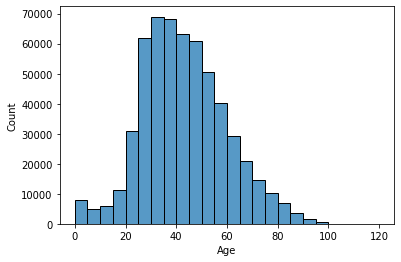

In [4]:
sb.histplot(data=df, x="Age", binwidth=5)

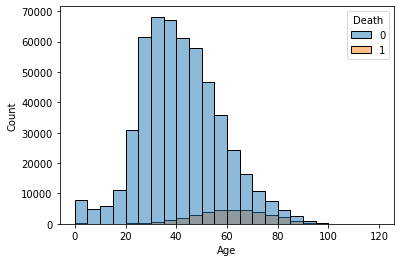

In [5]:
sb.histplot(data=df, x="Age", hue='Death', binwidth=5)

                           Death       Sex  ...  Tobacco User       Age
Death                   1.000000  0.073798  ...     -0.007320  0.284244
Sex                     0.073798  1.000000  ...     -0.103317  0.036553
Pneumonia              -0.411023 -0.084540  ...      0.010722 -0.281330
Pregnancy               0.018239  0.086194  ...     -0.017625  0.072087
Diabetes               -0.191113 -0.015990  ...      0.015936 -0.331846
Asthma                  0.016941  0.046423  ...      0.005824  0.026557
Hypertension           -0.181331 -0.009032  ...      0.013598 -0.393585
Other Disease          -0.049921  0.025870  ...      0.012801 -0.038286
Cardiovascular Disease -0.068511 -0.011064  ...      0.031072 -0.137568
Obesity                -0.049933  0.019006  ...      0.074548 -0.084559
Kidney Disease         -0.107805 -0.015827  ...      0.015483 -0.104020
Tobacco User           -0.007320 -0.103317  ...      1.000000 -0.014563
Age                     0.284244  0.036553  ...     -0.014563  1

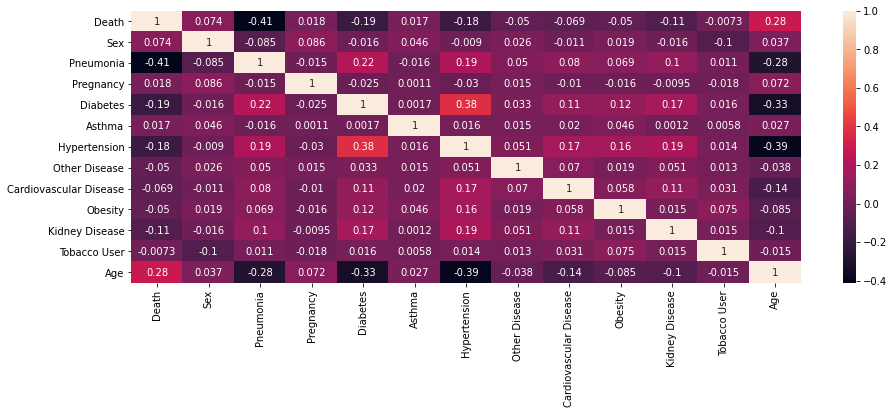

In [117]:
corrMatrix = df.corr()
print(corrMatrix)
plt.figure(figsize=(15,5))
sb.heatmap(corrMatrix, linewidths=.0000000001, annot=True)

Survival Rate = 0.937


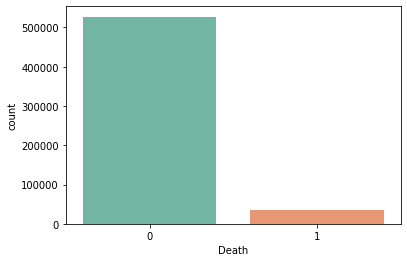

In [6]:
# EDA
# Survival Chart 
sb.countplot(x='Death', data =df, palette='Set2')
count_survived = len(df[df['Death']==0])
count_died = len(df[df['Death']==1])
total = 562804
pct_survived = float(count_survived/total)
print("Survival Rate = "+ str("{:.3f}".format(pct_survived)))


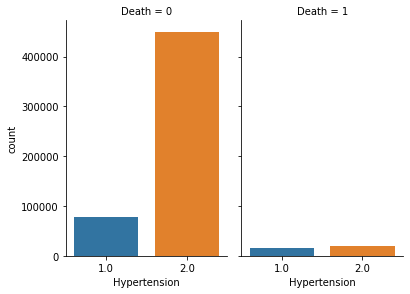

In [7]:
sb.catplot(x='Hypertension', col="Death", data=df, kind="count", height=4, aspect=.7);

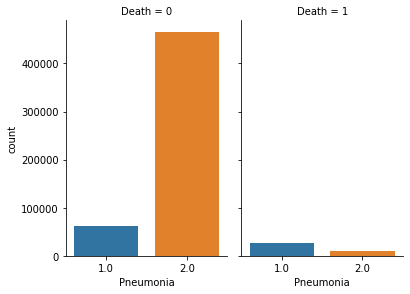

In [ ]:
sb.catplot(x='Pneumonia', col="Death", data=df, kind="count", height=4, aspect=.7);

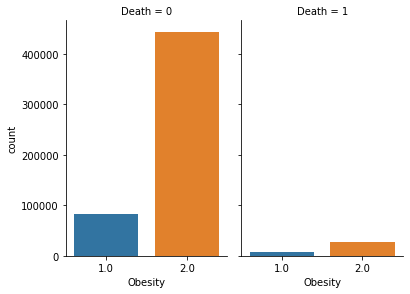

In [ ]:
sb.catplot(x='Obesity', col="Death", data=df, kind="count", height=4, aspect=.7);

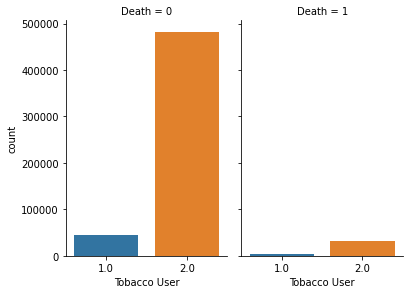

In [ ]:
sb.catplot(x='Tobacco User', col="Death", data=df, kind="count", height=4, aspect=.7)

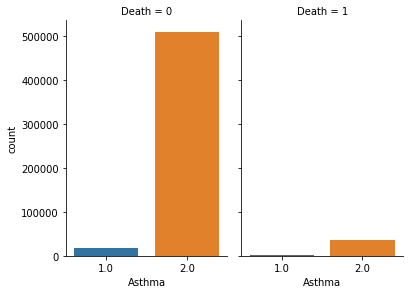

In [ ]:
sb.catplot(x='Asthma', col="Death", data=df, kind="count", height=4, aspect=.7)

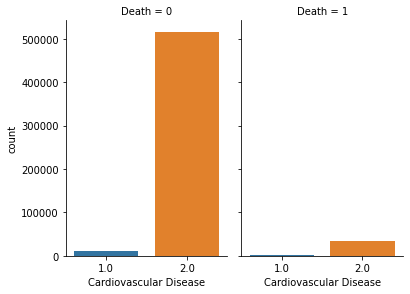

In [ ]:
sb.catplot(x='Cardiovascular Disease', col="Death", data=df, kind="count", height=4, aspect=.7)

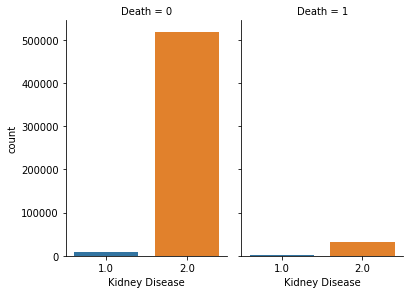

In [ ]:
sb.catplot(x='Kidney Disease', col="Death", data=df, kind="count", height=4, aspect=.7)

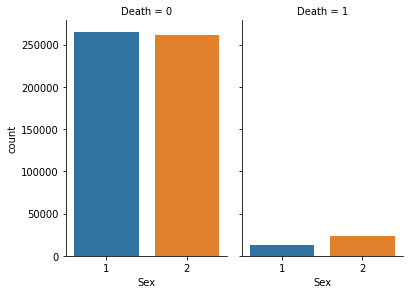

In [ ]:
sb.catplot(x='Sex', col="Death", data=df, kind="count", height=4, aspect=.7)

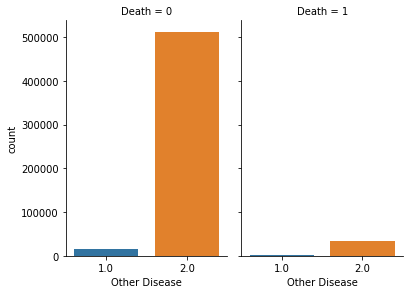

In [ ]:
sb.catplot(x='Other Disease', col="Death", data=df, kind="count", height=4, aspect=.7)

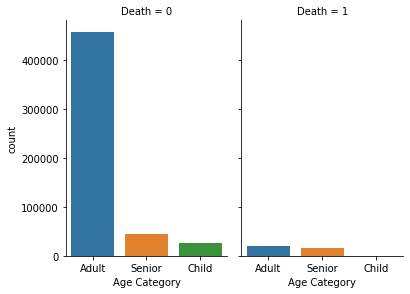

In [ ]:
sb.catplot(x='Age Category', col="Death", data=df, kind="count", height=4, aspect=.7)

In [88]:
X_non_dummy = df.iloc[:,1:13]
y = df.iloc[:,0]
print(X_non_dummy)
print(y)

        Sex  Pneumonia Age Category  ...  Obesity  Kidney Disease  Tobacco User
0         2        2.0        Adult  ...      2.0             2.0           2.0
1         2        2.0        Adult  ...      2.0             2.0           2.0
2         1        2.0        Adult  ...      1.0             2.0           2.0
3         2        1.0        Adult  ...      2.0             2.0           2.0
4         1        2.0        Adult  ...      2.0             2.0           2.0
...     ...        ...          ...  ...      ...             ...           ...
566597    2        2.0        Adult  ...      2.0             2.0           2.0
566598    1        2.0        Adult  ...      2.0             2.0           2.0
566599    1        1.0        Adult  ...      1.0             2.0           2.0
566600    1        1.0        Adult  ...      2.0             2.0           2.0
566601    2        1.0       Senior  ...      1.0             2.0           2.0

[562804 rows x 12 columns]
0         0


In [89]:
X = pd.get_dummies(X_non_dummy, columns=X_non_dummy.columns)
print(X.columns)

Index(['Sex_1', 'Sex_2', 'Pneumonia_1.0', 'Pneumonia_2.0',
       'Age Category_Adult', 'Age Category_Child', 'Age Category_Senior',
       'Pregnancy_1', 'Pregnancy_2', 'Diabetes_1.0', 'Diabetes_2.0',
       'Asthma_1.0', 'Asthma_2.0', 'Hypertension_1.0', 'Hypertension_2.0',
       'Other Disease_1.0', 'Other Disease_2.0', 'Cardiovascular Disease_1.0',
       'Cardiovascular Disease_2.0', 'Obesity_1.0', 'Obesity_2.0',
       'Kidney Disease_1.0', 'Kidney Disease_2.0', 'Tobacco User_1.0',
       'Tobacco User_2.0'],
      dtype='object')


In [90]:
#Decision Tree 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.3, random_state = 2020, stratify=y)

dt = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=2020)
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

Training Accuracy: 0.9363069529853437
Testing Accuracy:  0.9361928686147275


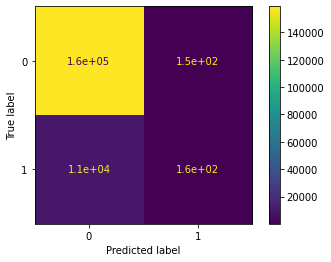

In [20]:
#Decision Tree Accuracy 
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
#print(cnf_matrix)
plot_confusion_matrix(dt, X_test, Y_test)
training_pred = dt.predict(X_train)
acc_training = accuracy_score(training_pred, Y_train)
print("Training Accuracy:", acc_training)
acc_testing = accuracy_score(y_pred, Y_test)
print("Testing Accuracy: ", acc_testing)

In [29]:
# Decision Tree feature importances 
feature_importances = dt.feature_importances_
features = X_train.columns
df2 = pd.DataFrame({'Features': features, 'Importance': feature_importances}).nlargest(5,'Importance')
print(df2)

                      Features  Importance
2                Pneumonia_1.0    0.752476
6          Age Category_Senior    0.155698
10                Diabetes_2.0    0.042159
1                        Sex_2    0.015283
13            Hypertension_1.0    0.009979
21          Kidney Disease_1.0    0.007544
14            Hypertension_2.0    0.004192
5           Age Category_Child    0.003396
15           Other Disease_1.0    0.003033
16           Other Disease_2.0    0.001985
20                 Obesity_2.0    0.001059
9                 Diabetes_1.0    0.000877
0                        Sex_1    0.000579
22          Kidney Disease_2.0    0.000539
17  Cardiovascular Disease_1.0    0.000361
11                  Asthma_1.0    0.000301
12                  Asthma_2.0    0.000240
18  Cardiovascular Disease_2.0    0.000164
23            Tobacco User_1.0    0.000080
24            Tobacco User_2.0    0.000056
3                Pneumonia_2.0    0.000000
4           Age Category_Adult    0.000000
7          

Training Accuracy: 0.9368137028444368
Testing Accuracy: 0.9366982148991365


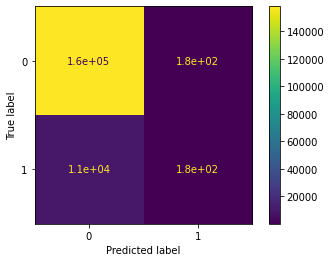

In [91]:
# Decision Tree AdaBoost Classification 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2020, stratify=y)
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)
adaboost_y_pred = ada_boost1.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
#print(cnf_matrix)
plot_confusion_matrix(ada_boost1, X_test, y_test)
training_pred = ada_boost1.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Training Accuracy:", acc_training)
print('Testing Accuracy:', accuracy_score(Y_test, adaboost_y_pred))

In [63]:
#Feature Importances
feature_importances = ada_boost1.feature_importances_
features = X_train.columns
df3 = pd.DataFrame({'Features': features, 'Importance': feature_importances}).nlargest(24,'Importance')
print(df3)

                      Features  Importance
3                Pneumonia_2.0    0.131811
2                Pneumonia_1.0    0.106417
6          Age Category_Senior    0.091326
5           Age Category_Child    0.055178
9                 Diabetes_1.0    0.046108
10                Diabetes_2.0    0.045683
0                        Sex_1    0.042212
21          Kidney Disease_1.0    0.041238
1                        Sex_2    0.039045
13            Hypertension_1.0    0.037060
22          Kidney Disease_2.0    0.034375
4           Age Category_Adult    0.033638
14            Hypertension_2.0    0.032641
20                 Obesity_2.0    0.030056
15           Other Disease_1.0    0.027876
19                 Obesity_1.0    0.026173
18  Cardiovascular Disease_2.0    0.026151
12                  Asthma_2.0    0.024013
16           Other Disease_2.0    0.022838
23            Tobacco User_1.0    0.022620
17  Cardiovascular Disease_1.0    0.022221
11                  Asthma_1.0    0.020227
24         

In [94]:
#Index(['Sex_1', 'Sex_2', 'Pneumonia_1.0', 'Pneumonia_2.0',
      #'Age Category_Adult', 'Age Category_Child', 'Age Category_Senior',
       #'Pregnancy_1', 'Pregnancy_2', 'Diabetes_1.0', 'Diabetes_2.0',
       #'Asthma_1.0', 'Asthma_2.0', 'Hypertension_1.0', 'Hypertension_2.0',
       #'Other Disease_1.0', 'Other Disease_2.0', 'Cardiovascular Disease_1.0',
       #'Cardiovascular Disease_2.0', 'Obesity_1.0', 'Obesity_2.0',
       #'Kidney Disease_1.0', 'Kidney Disease_2.0', 'Tobacco User_1.0',
       #'Tobacco User_2.0'],
      #dtype='object')
X_new = [[0,1, 1,0, 0,0,1, 0,1, 1,0, 1,0, 1,0, 1,0, 1,0, 1,0, 1,0, 1,0 ]]
prediction = ada_boost1.predict(X_new)
print("Predicted outcome (0 = Survival, 1 = Death):",prediction)

Predicted outcome (0 = Survival, 1 = Death): [1]


In [95]:
df_new = df[['Death', 'Pneumonia','Age Category','Hypertension','Obesity','Diabetes','Kidney Disease','Asthma' ]]
#print(df_new)
X_non_dummy = df_new.iloc[:,1:8]
y = df_new.iloc[:,0]
print(X_non_dummy)
print(y)

        Pneumonia Age Category  Hypertension  ...  Diabetes  Kidney Disease  Asthma
0             2.0        Adult           2.0  ...       2.0             2.0     2.0
1             2.0        Adult           2.0  ...       2.0             2.0     2.0
2             2.0        Adult           2.0  ...       2.0             2.0     2.0
3             1.0        Adult           2.0  ...       2.0             2.0     2.0
4             2.0        Adult           1.0  ...       1.0             2.0     2.0
...           ...          ...           ...  ...       ...             ...     ...
566597        2.0        Adult           2.0  ...       1.0             2.0     2.0
566598        2.0        Adult           2.0  ...       2.0             2.0     2.0
566599        1.0        Adult           2.0  ...       2.0             2.0     2.0
566600        1.0        Adult           2.0  ...       2.0             2.0     2.0
566601        1.0       Senior           1.0  ...       1.0             2.0 

In [96]:
X = pd.get_dummies(X_non_dummy, columns=X_non_dummy.columns)
print(X.columns)

Index(['Pneumonia_1.0', 'Pneumonia_2.0', 'Age Category_Adult',
       'Age Category_Child', 'Age Category_Senior', 'Hypertension_1.0',
       'Hypertension_2.0', 'Obesity_1.0', 'Obesity_2.0', 'Diabetes_1.0',
       'Diabetes_2.0', 'Kidney Disease_1.0', 'Kidney Disease_2.0',
       'Asthma_1.0', 'Asthma_2.0'],
      dtype='object')


[[158026    132]
 [ 10550    134]]
Training Accuracy: 0.9367400916839695
Testing Accuracy: 0.9366863695052179


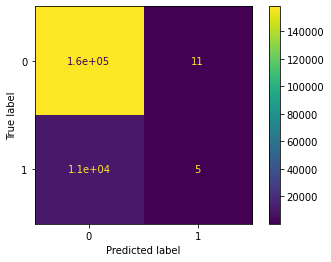

In [98]:
#AdaBoost With less features 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2020, stratify=y)
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost2 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost2.fit(X_train, y_train)
adaboost_y_pred = ada_boost2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(cnf_matrix)
plot_confusion_matrix(ada_boost2, X_test, y_test)
training_pred = ada_boost2.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Training Accuracy:", acc_training)
print('Testing Accuracy:', accuracy_score(Y_test, adaboost_y_pred))

In [101]:
feature_importances = ada_boost2.feature_importances_
features = X_train.columns
df4 = pd.DataFrame({'Features': features, 'Importance': feature_importances}).nlargest(24,'Importance')
print(df4)

               Features  Importance
0         Pneumonia_1.0    0.149417
1         Pneumonia_2.0    0.138708
11   Kidney Disease_1.0    0.101217
4   Age Category_Senior    0.078621
12   Kidney Disease_2.0    0.076667
9          Diabetes_1.0    0.066133
10         Diabetes_2.0    0.061123
6      Hypertension_2.0    0.058778
5      Hypertension_1.0    0.053072
7           Obesity_1.0    0.047979
3    Age Category_Child    0.044210
8           Obesity_2.0    0.040005
2    Age Category_Adult    0.029688
13           Asthma_1.0    0.029195
14           Asthma_2.0    0.025186


In [100]:
# Prediction with all co-morbididty factors 
#Index(['Pneumonia_1.0', 'Pneumonia_2.0', 'Age Category_Adult',
       #'Age Category_Child', 'Age Category_Senior', 'Hypertension_1.0',
       #'Hypertension_2.0', 'Obesity_1.0', 'Obesity_2.0', 'Diabetes_1.0',
       #'Diabetes_2.0', 'Kidney Disease_1.0', 'Kidney Disease_2.0', Asthma1.0, Asthma2.0]
X_new = [[1,0, 0,0,1, 1,0, 1,0, 1,0, 1,0, 1,0]]
prediction = ada_boost2.predict(X_new)
print("Predicted outcome (0 = Survival, 1 = Death):",prediction)

Predicted outcome (0 = Survival, 1 = Death): [1]


In [103]:
# Prediction with 6/7 factors
X_new1 = [[1,0, 0,0,1, 1,0, 1,0, 1,0, 1,0, 0,1]]
prediction = ada_boost2.predict(X_new1)
print("Predicted outcome (0 = Survival, 1 = Death):",prediction)

Predicted outcome (0 = Survival, 1 = Death): [0]


In [104]:
X_new1 = [[1,0, 0,1,0, 1,0, 1,0, 1,0, 1,0, 1,0]]
prediction = ada_boost2.predict(X_new1)
print("Predicted outcome (0 = Survival, 1 = Death):",prediction)

Predicted outcome (0 = Survival, 1 = Death): [0]


Training Accuracy: 0.9372625251814705
Testing Accuracy:		 0.9357281107888529


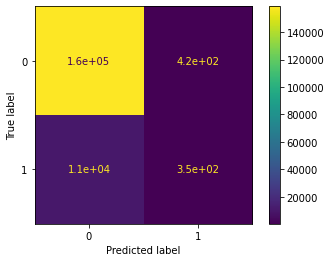

In [23]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
training_pred = model_rf.predict(X_train)
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
#print(cnf_matrix)
plot_confusion_matrix(model_rf, X_test, y_test)
acc_training = accuracy_score(training_pred, y_train)
print("Training Accuracy:", acc_training)
acc_rf= accuracy_score(y_test, predict_rf)
print('Testing Accuracy:\t\t',acc_rf)

In [21]:
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'Features': features, 'Importance': feature_importances}).nlargest(5,'Importance')
print(df)

               Features  Importance
2         Pneumonia_1.0    0.362805
3         Pneumonia_2.0    0.285585
6   Age Category_Senior    0.098211
4    Age Category_Adult    0.050844
10         Diabetes_2.0    0.028075
